In [50]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                    'machine-learning-databases/wine/wine.data',
                    header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines', 'Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=0.3, stratify=y, random_state=0)

# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [52]:
import numpy as np
# 共分散行列を作成
conv_mat = np.cov(X_train_std.T)
# 固有値(13)と固有ベクトル(13x13)を計算
eigen_vals, eigen_vecs = np.linalg.eig(conv_mat)
print('\nEigenvalues \n%s' % eigen_vals)



Eigenvalues 
[4.8427 2.416  1.5485 0.9612 0.8417 0.6621 0.5183 0.3465 0.3131 0.1075
 0.2136 0.1536 0.1809]


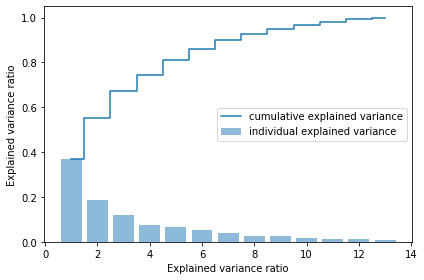

In [53]:
# 固有値を合計
tot = sum(eigen_vals)
# 分散説明率を計算
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
# 分散説明率の棒グラフを作成
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
# 分散説明率の累積わの階段グラフを作成
plt.step(range(1, 14), cum_var_exp, where='mid',
            label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [54]:
# (固有値、固有ベクトル)のタプルのリストを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                    for i in range(len(eigen_vals))]

# (固有値、固有ベクトル)のタプルを大きいものから順に並べ替え
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [55]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
                eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)


Matrix W:
 [[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


In [56]:
X_train_std[0].dot(w)


array([2.383 , 0.4546])

In [57]:
X_train_pca = X_train_std.dot(w)


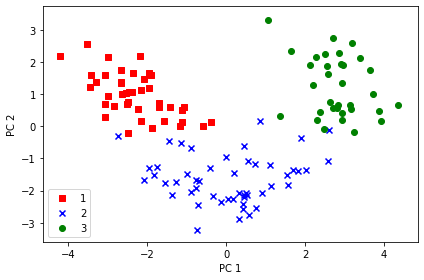

In [58]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [59]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    color = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(color[:len(np.unique(y))])

    # 決定領域プロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=color[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')


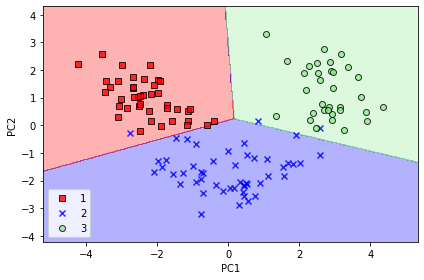

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# 主成分数を指定して、PCAのインスタンスを生成
pca = PCA(n_components=2)

lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()



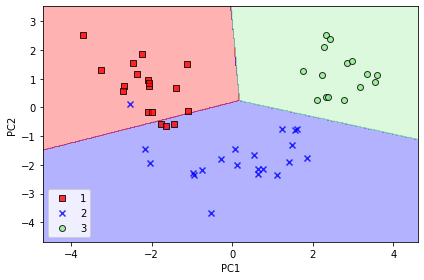

In [61]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [62]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
# 分散説明率を計算
pca.explained_variance_ratio_


array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

In [63]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))



MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [64]:
d = 13 # features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    
    S_W += class_scatter

print('within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))


within-class scatter matrix: 13x13


In [65]:
# が、それを満たしていないことが分かる
print('Class label distribution: %s' % np.bincount(y_train)[1:])


Class label distribution: [41 50 33]


In [66]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print('within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))


within-class scatter matrix: 13x13


In [67]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train==i+1, :].shape[0]

    # 列ベクトルを作成
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n* (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))


Between-class scatter matrix: 13x13


In [68]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


In [69]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                    for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])


Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


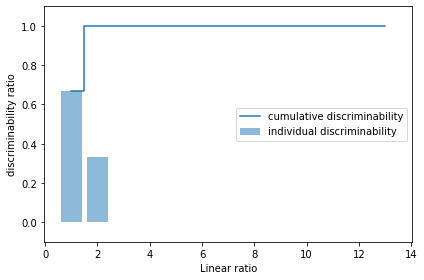

In [70]:
# 固有値の実数部の総和を求める
tot = sum(eigen_vals.real)
# 分散説明率とその累積和
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

# 分散説明率の棒グラフを作成
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
            label='individual discriminability')
# 分散説明率の累積わの階段グラフを作成
plt.step(range(1, 14), cum_discr, where='mid',
            label='cumulative discriminability')

plt.ylabel('discriminability ratio')
plt.xlabel('Linear ratio')

plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [71]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
                eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)



Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


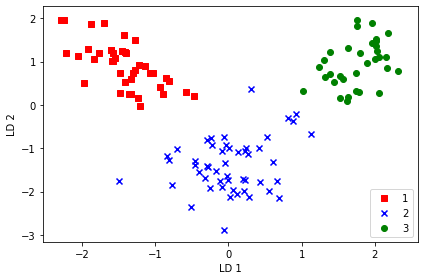

In [72]:
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], 
                X_train_lda[y_train==l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


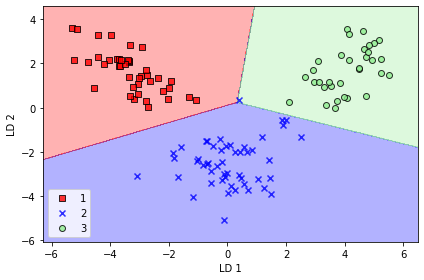

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression()
lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()



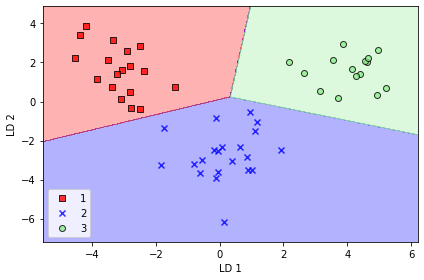

In [74]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [75]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """RBFカーネルPCAの実装

    params
    --------------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]

    gamma: float
        RBFカーネルのチューニングパラメータ
    
    return
    --------------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
    """

    # MxN次元のデータセットでペアごとのユークリッド距離の2乗を計算
    sq_dists = pdist(X, 'sqeuclidean')
    # ペアごとの距離を正方行列に変換
    mat_sq_dists = squareform(sq_dists)

    # 対象カーネル行列を計算
    K = exp(-gamma * mat_sq_dists)

    # カーネル行列を中心化
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 中心化されたカーネル行列から固有対を取得
    # scipy.linalg.eignはそれらを昇順で返す
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, :: -1]

    # 上位k個の固有ベクトルを収集
    X_pc = np.column_stack((eigvecs[:, i]
                            for i in range(n_components)))
    
    return X_pc


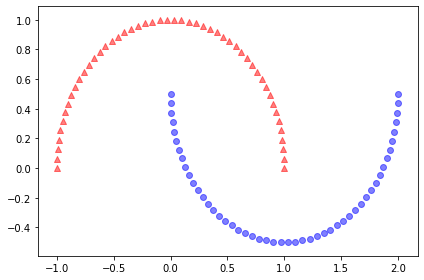

In [76]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()


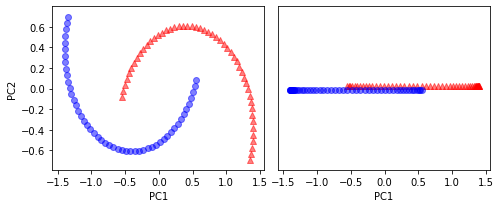

In [77]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
# 1番目のグラフに散布図をプロット
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
                color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
                color='blue', marker='o', alpha=0.5)


# 2番目のグラフに散布図をプロット
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
                color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
                color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()



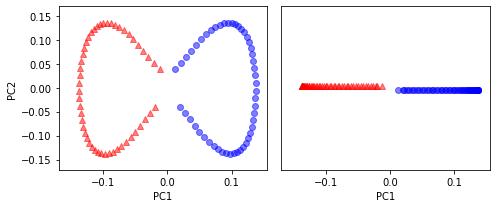

In [78]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
# 1番目のグラフに散布図をプロット
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
                color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
                color='blue', marker='o', alpha=0.5)


# 2番目のグラフに散布図をプロット
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
                color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
                color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()


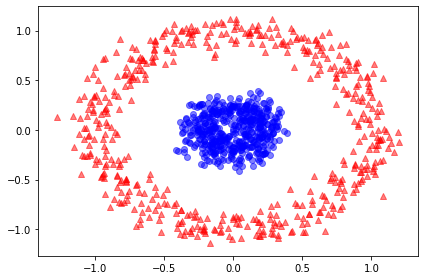

In [79]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()


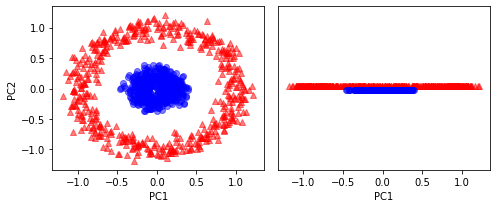

In [80]:

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
# 1番目のグラフに散布図をプロット
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
                color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
                color='blue', marker='o', alpha=0.5)


# 2番目のグラフに散布図をプロット
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,
                color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
                color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()


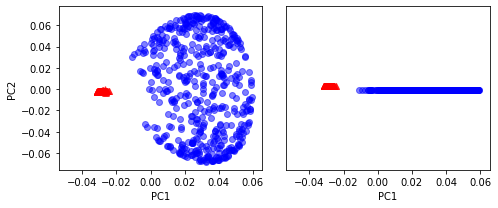

In [81]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
# 1番目のグラフに散布図をプロット
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
                color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
                color='blue', marker='o', alpha=0.5)


# 2番目のグラフに散布図をプロット
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,
                color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
                color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()


In [82]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """ RBFカーネルPCAの実装

    param
    ------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]

    gamma: float
        RBFカーネルのチューニングパラメータ
    
    n_components: int
        返される主成分の数
    
    return
    ------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
        射影されたデータセット
    
    lambdas: list

    """

    # MxN次元のデータセットでペアごとのユークリッド距離の2乗を計算
    sq_dists = pdist(X, 'sqeuclidean')

    # ペアごとの距離を正方行列に変換
    mat_sq_dists = squareform(sq_dists)

    # 対象カーネル行列を計算
    K = exp(-gamma * mat_sq_dists)

    # カーネル行列を中心化
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 中心化されたカーネル行列から固有対を取得: scipy.linaglg.eighはそれらを昇順で返す
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # 上位のk個の固有ベクトル（射影されたサンプル）を収集
    alphas = np.column_stack((eigvecs[:, i]
                                for i in range(n_components)))
    
    # 対応する固有値を収集
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas


In [83]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)



In [84]:
x_new = X[25]
x_new


array([1.8713, 0.0093])

In [85]:
x_proj = alphas[25]
x_proj


array([0.0788])

In [86]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj


array([0.0788])

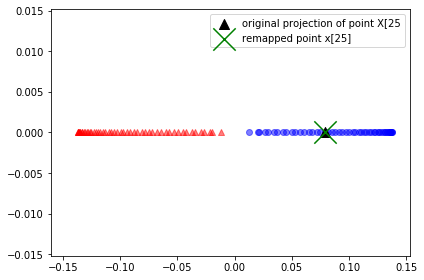

In [87]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25',
                marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point x[25]',
                marker='x', s=500)
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()



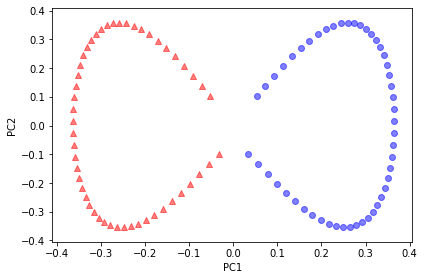

In [88]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
                color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
                color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

